# **Predictive Modeling for Rocket Landing Success**  
### *A Machine Learning Approach Using SpaceX Falcon 9 Data* 


## **EDA (Exploratory Data Analysis)**

### Import Libraries


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the SpaceX dataset `data_falcon9_V2.csv`

In [106]:
file_path = r"C:\Users\cjchavarria\Desktop\Rocket-Landing-Success-ML\02-data-wrangling\data_falcon9_V2.csv"

In [107]:
df = pd.read_csv( file_path )

In [108]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


#### Analyzing the impact of `FlightNumber` and `PayloadMass` on launch outcomes

In this step, we examine how the `FlightNumber` (indicating the sequence of launches) and `PayloadMass` affect the success of the first stage landing. We hypothesize that:

1. As the flight number increases, SpaceX may have improved its technology and procedures, increasing the likelihood of successful landings.
2. Payload mass may inversely affect the success rate, as heavier payloads could make the landing process more challenging.

To visualize these relationships, we plot `FlightNumber` against `PayloadMass` and overlay the launch outcomes (`Class`).


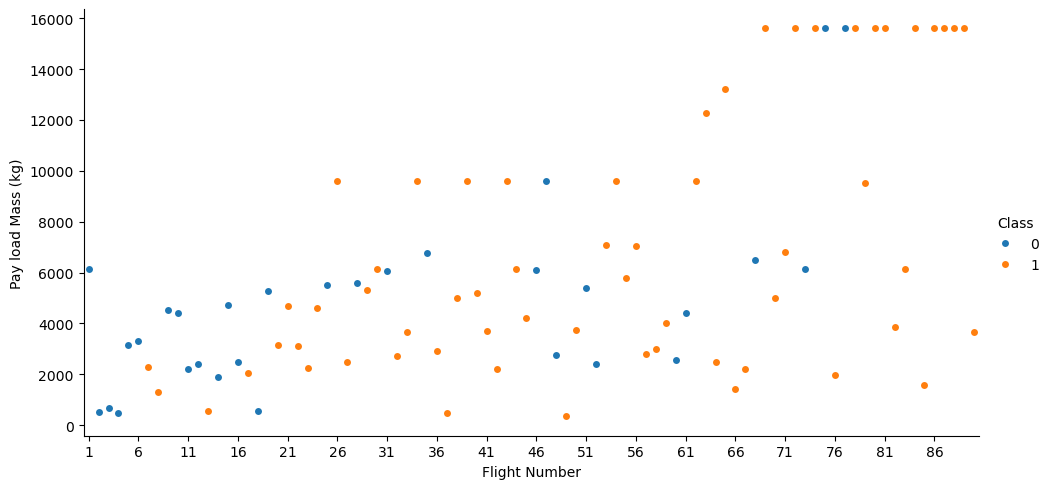

In [109]:
sns.catplot(y = "PayloadMass", x = "FlightNumber", hue = "Class", data = df , aspect = 2)
plt.xlabel("Flight Number", fontsize = 10)
plt.ylabel("Pay load Mass (kg)", fontsize = 10)
# Reduce the density by limiting the number of x-ticks (display every 5th flight number, for example)
plt.xticks(ticks=range(0, len(df['FlightNumber'].unique()), 5))
plt.show()

#### Visualize the relationship between Flight Number and Launch Site

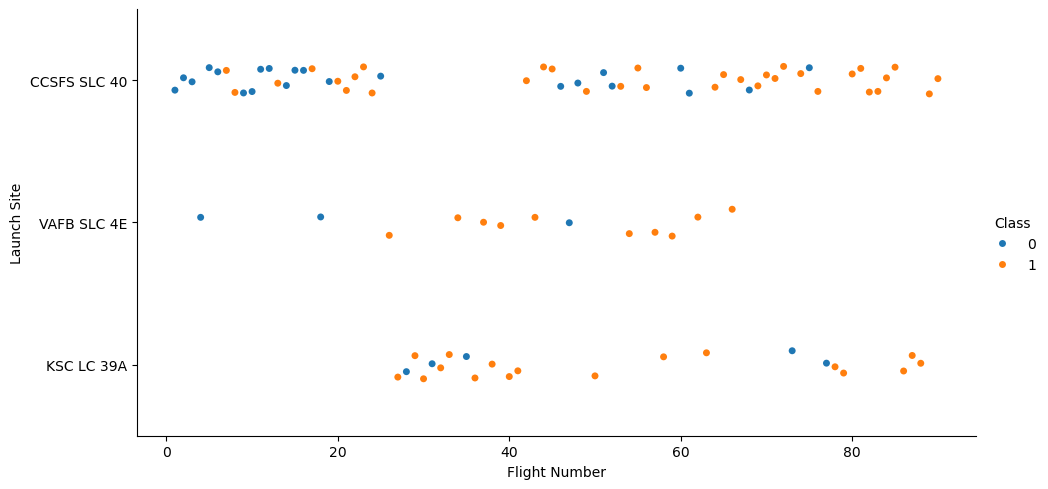

In [110]:
sns.catplot(y = "LaunchSite", x = "FlightNumber", hue = "Class", data = df, aspect = 2)
plt.xlabel("Flight Number", fontsize = 10)
plt.ylabel("Launch Site", fontsize = 10)
plt.show()

#### Visualize the relationship between Payload and Launch Site

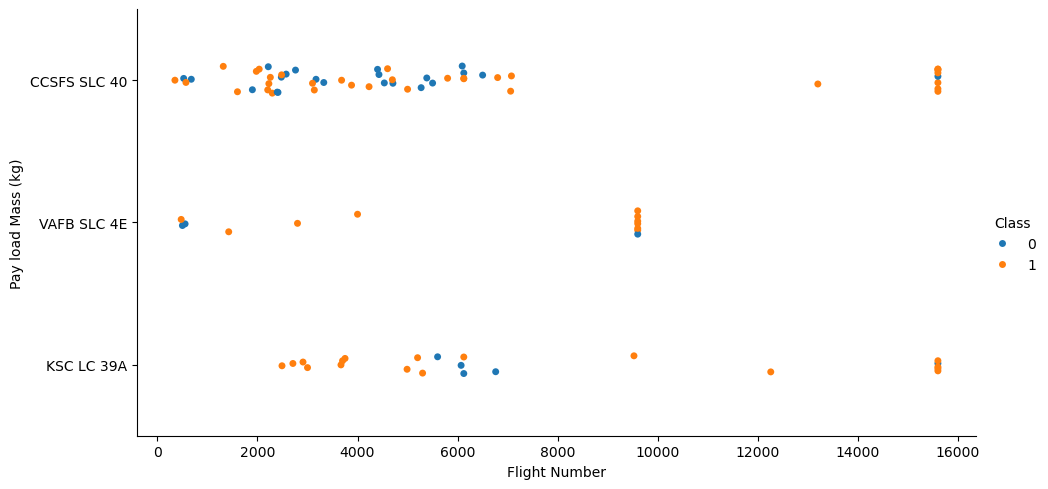

In [111]:
sns.catplot(y = "LaunchSite", x = "PayloadMass", hue = "Class", data = df, aspect = 2)
plt.xlabel("Flight Number", fontsize = 10)
plt.ylabel("Pay load Mass (kg)", fontsize = 10)
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).

#### Visualize the relationship between success rate of each orbit type

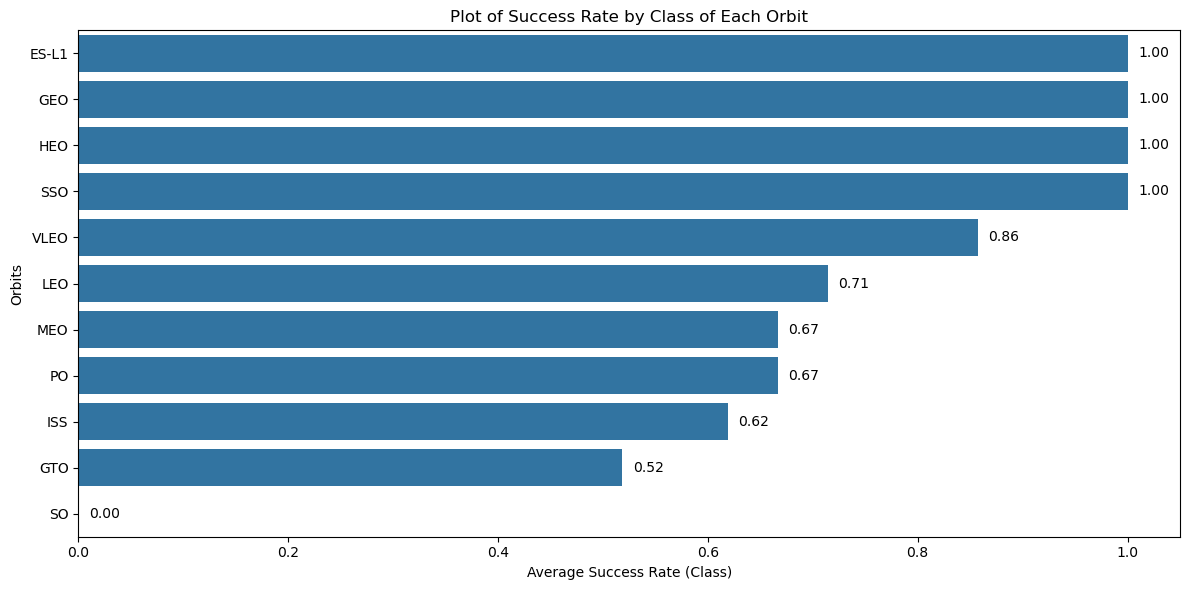

In [112]:
# Group data by 'Orbit' and calculate the mean success rate ('Class') for each orbit
grouped_orbits = df.groupby(by=['Orbit'])['Class'].mean().sort_values(ascending=False).reset_index()

# Create a figure and axis for the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Generate a horizontal bar chart
sns.barplot(x='Class', y='Orbit', data=grouped_orbits, ax=ax, orient='h')

# Add labels to each bar
for p in ax.patches:
    # Get the width of each bar
    width = p.get_width()
    
    # Add the label at the end of each bar
    ax.text(width + 0.01, p.get_y() + p.get_height() / 2, 
            f'{width:.2f}', va='center', ha='left', fontsize=10)

# Set the title and axis labels for the chart
ax.set_title('Plot of Success Rate by Class of Each Orbit', fontdict={'size': 12})
ax.set_xlabel('Average Success Rate (Class)', fontsize=10)
ax.set_ylabel('Orbits', fontsize=10)

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Display the chart
plt.show()


#### Visualize the relationship between `FlightNumber` and `Orbit Type`

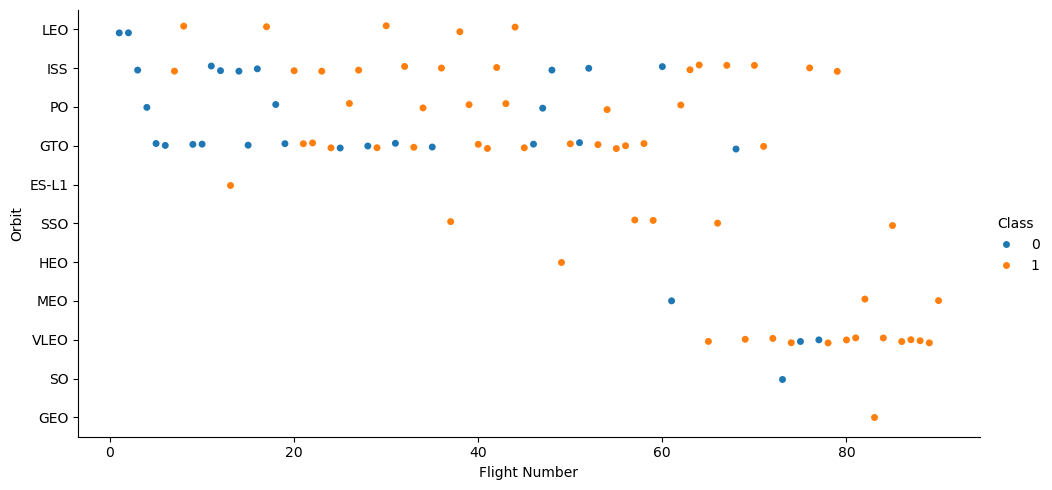

In [113]:
sns.catplot(y = "Orbit", x = "FlightNumber", hue = "Class", data = df, aspect = 2)
plt.xlabel("Flight Number",fontsize=10)
plt.ylabel("Orbit",fontsize=10)
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

### Visualize the relationship betwee Payload and Orbit type

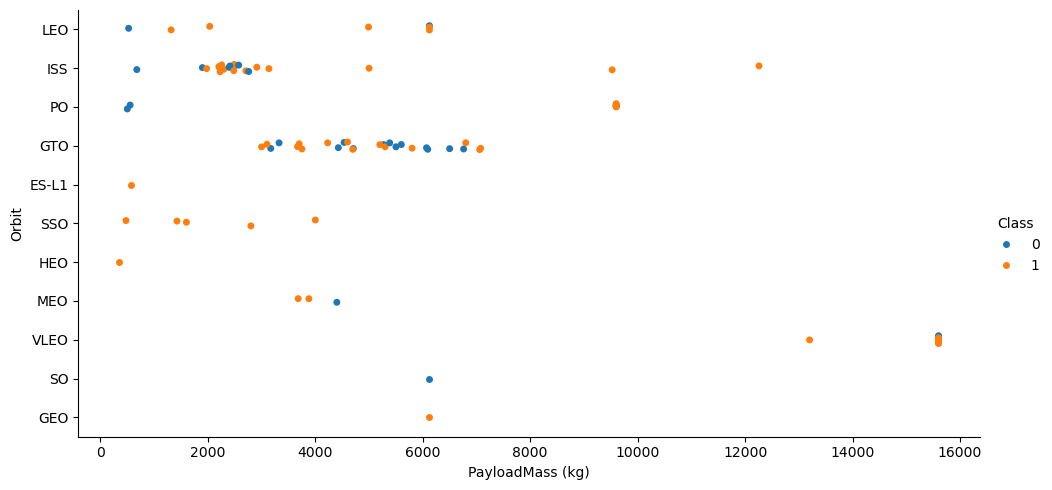

In [114]:
sns.catplot(y = "Orbit", x = "PayloadMass", hue = "Class", data = df , aspect = 2)
plt.xlabel("PayloadMass (kg)", fontsize = 10)
plt.ylabel("Orbit", fontsize = 10)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.

### Visualize the launch success yearly trend

In [115]:
df_copy = df.copy()
df_copy['Year'] = pd.DatetimeIndex(df_copy['Date']).year

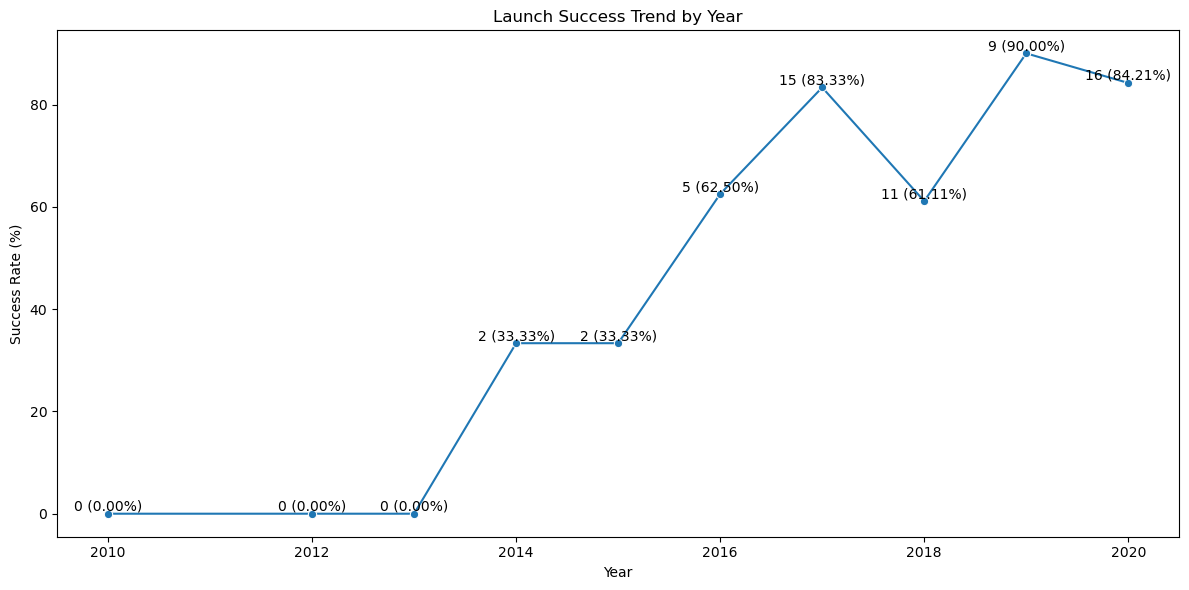

In [116]:
# Calculate the count of rows with Class = 1 and the success percentage
grouped = df_copy.groupby('Year')['Class'].agg(['sum', 'count'])
grouped['success_percentage'] = (grouped['sum'] / grouped['count']) * 100

# Create the line plot
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=grouped, x=grouped.index, y='success_percentage', marker='o')

# Add labels with success count and success percentage
for x_val, y_val, count in zip(grouped.index, grouped['success_percentage'], grouped['sum']):
    ax.text(x_val, y_val, f'{int(count)} ({y_val:.2f}%)', ha='center', va='bottom')

# Set titles and labels
plt.title('Launch Success Trend by Year')
plt.xlabel('Year')
plt.ylabel('Success Rate (%)')

# Display the plot
plt.tight_layout()
plt.show()


You can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.

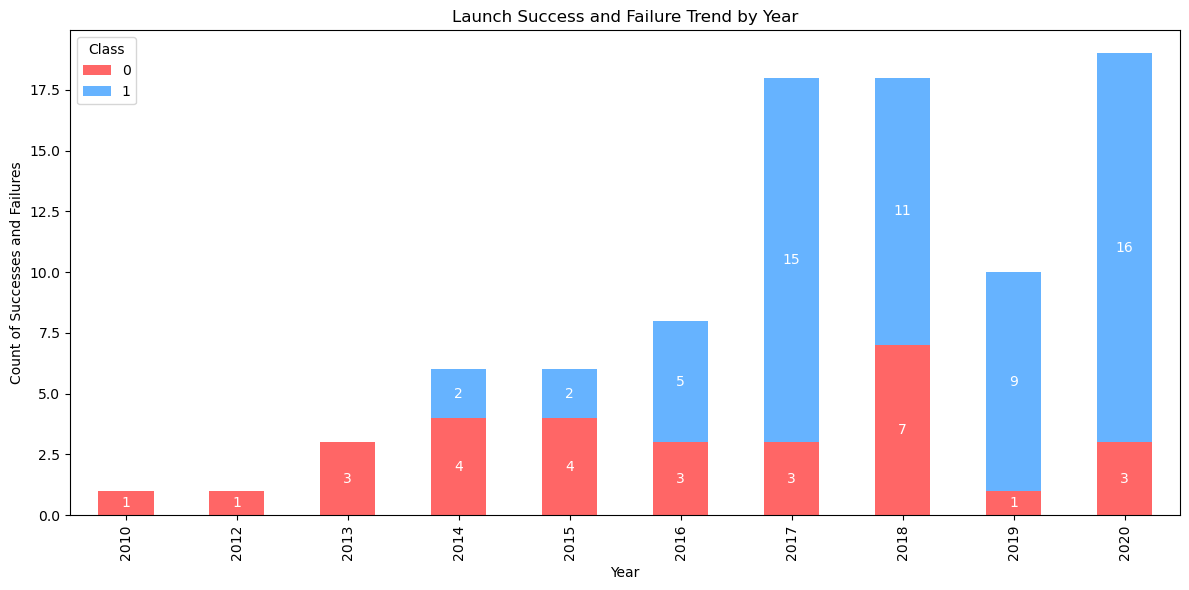

In [117]:
# Calculate the count of Class 0 and Class 1 per year
grouped = df_copy.groupby('Year')['Class'].value_counts().unstack(fill_value=0)

# Create the stacked bar plot
ax = grouped.plot(kind='bar', stacked=True, figsize=(12, 6), color=[ '#ff6666','#66b3ff'])

# Add labels for each bar, but only if the count is greater than 0
for p in ax.patches:
    height = p.get_height()  # Get the height of the section
    if height > 0:  # Only add a label if the height is greater than 0
        width = p.get_width()    # Get the width (not needed here but can be useful for positioning)
        x = p.get_x() + width / 2  # Get x position (center of the bar section)
        y = p.get_y() + height / 2  # Get y position (center of the bar section)
        
        # Add the label at the center of each section
        ax.text(x, y, f'{int(height)}', ha='center', va='center', fontsize=10, color='white')

# Set titles and labels
plt.title('Launch Success and Failure Trend by Year')
plt.xlabel('Year')
plt.ylabel('Count of Successes and Failures')

# Display the plot
plt.tight_layout()
plt.show()



### Feature Engineering